<a href="https://colab.research.google.com/github/osamazafar980/Convolution-Filter-Application-For-Image-Filtering/blob/master/Convolution_Filter_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing

In [0]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from skimage.color import rgb2gray
import copy
import math

Loading Image

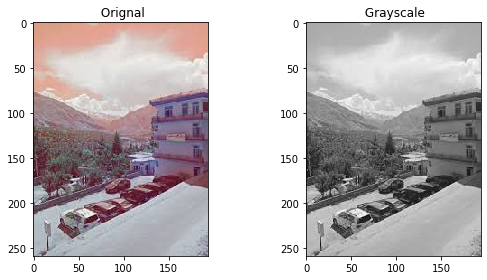

In [103]:
original = cv.imread('image.jpg')
grayscale = rgb2gray(original)
def plot(image,msg):
  grayscale = rgb2gray(image)
  figure,axes = plt.subplots(1,2,figsize=(8,4))
  axes =axes.ravel()
  axes[0].imshow(image)
  title=msg+" Orignal"
  axes[0].set_title(title)
  axes[1].imshow(grayscale,cmap='gray')
  title=msg+" Grayscale"
  axes[1].set_title(title)
  figure.tight_layout()
  plt.show
plot(original,"")

*Solution 1* (Using Constant Value 0 for padded region of image)



Filter

[[0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0

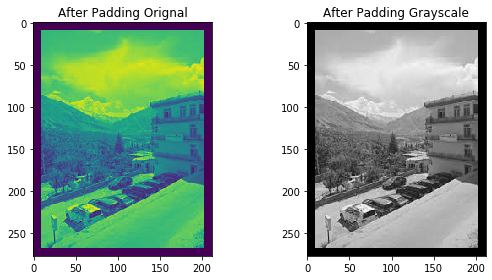

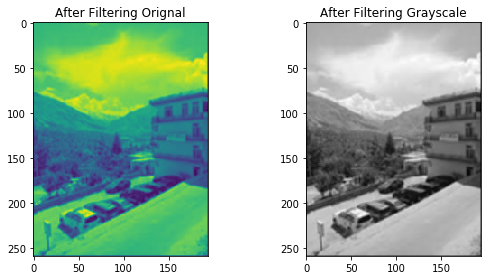

In [105]:
def padding(img,size):
  newImage = np.pad(img,size,'constant',constant_values=0)
  plot(newImage,"After Padding")
  return newImage

def filtering(image,filters):
  filterShape = filters.shape
  imageShape=image.shape
  paddingSize=math.floor(filterShape[0]//2)
  image=padding(image,paddingSize)
  newImage = np.zeros(imageShape)
  for row in range(paddingSize,(imageShape[0]+paddingSize)):
    for col in range(paddingSize,(imageShape[1]+paddingSize)):
      newValues=[]
      xx=0
      for x in range(row-1,row+2):
        yy=0
        for y in range(col-1,col+2):
          value=filters[xx][yy]*image[x][y]
          newValues.append(value)
          yy=yy+1
        xx=xx+1
      newImage[row-paddingSize][col-paddingSize]=sum(newValues)
  return newImage
filters = np.full((19,19),0.11)
print("\n\nFilter\n")
print(filters)
filterImage=filtering(grayscale,filters)
plot(filterImage,"After Filtering")
print("\n\nFiltered Image Values\n")
print(filterImage)


Solution 2 (Using average area values for padded region of image)



Filter

[[0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0.11 0.11]
 [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
  0.11 0.11 0.11 0

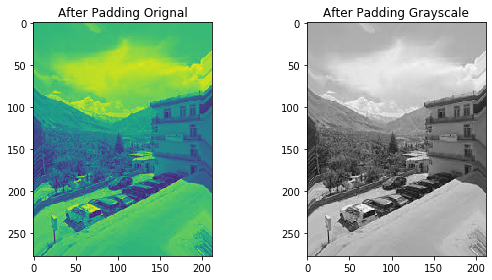

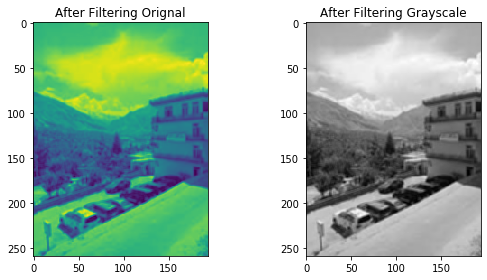

In [106]:
def areaPadding(image,size):
  shape=image.shape
  print(shape)
  newImage = np.pad(image,size,'constant',constant_values=0)
  newShape=newImage.shape
  for row in range(0,newShape[0]):
    for col in range(0,newShape[1]):
      if newImage[row][col]==0:
        value=0
        counter=0
        while(value==0):
          counter=counter+1
          if(row<(shape[0]//2) and col>(shape[1]//2)):
            value=newImage[row+counter][col-counter]
          elif(row>(shape[0]//2) and col<(shape[1]//2)):
            value=newImage[row-counter][col+counter]
          elif(row>=(shape[0]//2) and col>=(shape[1]//2)):
            value=newImage[row-counter][col-counter]
          else:
            value=newImage[row+counter][col+counter]
        
        newImage[row][col]=value
  plot(newImage,"After Padding")
  return newImage
def newFiltering(image,filters):
  filterShape = filters.shape
  imageShape=image.shape
  paddingSize=math.floor(filterShape[0]//2)
  image=areaPadding(image,paddingSize)
  newImage = np.ones(imageShape)
  for row in range(paddingSize,imageShape[0]+paddingSize):
    for col in range(paddingSize,imageShape[1]+paddingSize):
      newValues=[]
      xx=0
      for x in range(row-1,row+2):
        yy=0
        for y in range(col-1,col+2):
          value=filters[xx][yy]*image[x][y]
          newValues.append(value)
          yy=yy+1
        xx=xx+1
      newImage[row-paddingSize][col-paddingSize]=sum(newValues)
  return newImage
filters = np.full((19,19),0.11)
print("\n\nFilter\n")
print(filters)
filterImage=newFiltering(grayscale,filters)
plot(filterImage,"After Filtering")
print("\n\nFiltered Image Values\n")
print(filterImage)
